### Pulling waveforms by evid tutorial notebook

1. src/notebooks/pull_wf_by_evid_tutorial.ipynb
2. It is a tutorial notebook for 'pull_wf_by_evid.py' module (access via src/python/pull_wf_by_evid.py).

In [1]:
# import essential dependencies
import os,sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from obspy import read
from obspy.core import UTCDateTime
from obspy.clients.fdsn import Client

sys.path.append(os.path.join('..','..','src','python'))

from pull_wf_by_evid import *

In [2]:
# fetch data from the CSV file
phases_df = format_aqms_csv('MtBaker_20km_radius_phases.csv')

In [3]:
# curate data from the previously obtained dataframe based on evid (event ID)
lf_baker = get_phase_entries(phases_df, 60493937)

In [4]:
# define pick parameter used to select the interested station (e.g., station 'MBW)
pick = lf_baker[lf_baker.sta == 'MBW'].iloc[0, :] if not lf_baker.empty else None

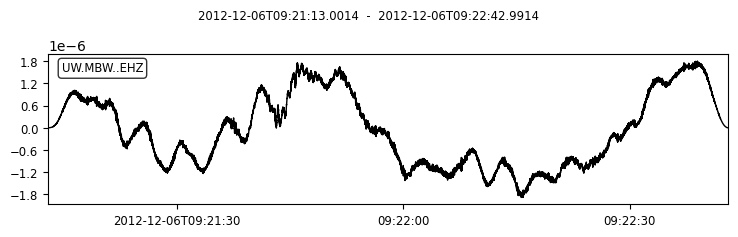

In [5]:
# get wavefrom from IRIS web service and pick parameter
st = get_waveforms_from_phases('IRIS', pick)

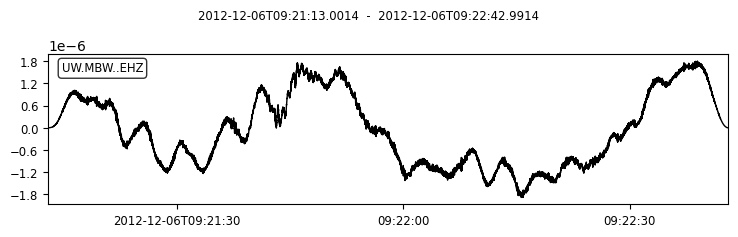

Waveforms saved to ../../results/waveforms/UW.MBW..EHZ.60493937.mseed


/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/obspy/io/mseed/core.py:773: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


In [6]:
# save the stream objects obtained from the above function as MSEED file
output = get_waveforms('MtBaker_20km_radius_phases.csv',60493937,'IRIS', pick)

1 Trace(s) in Stream:
UW.MBW..EHZ | 2012-12-06T09:21:13.001400Z - 2012-12-06T09:22:42.991400Z | 100.0 Hz, 9000 samples


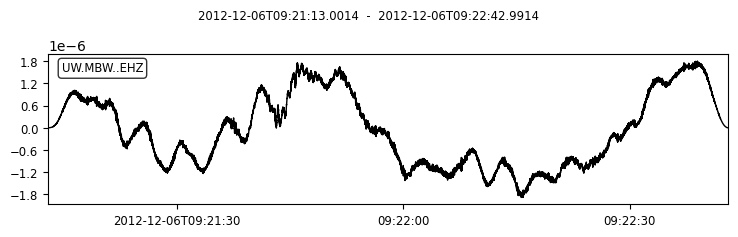

In [7]:
# read the previously saved file to recheck the result
tr = read('../../results/waveforms/UW.MBW..EHZ.60493937.mseed')
print(tr)
tr.plot();